# SIMO

In [ ]:
import numpy as np
from numba import jit
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [12, 8]

In [ ]:
# Create channel.
# Assume flat fading channel so channel is single tap amplitude and phase shift.
h = np.random.random((4, 1)) + 1j*np.random.random((4, 1))
print(h.shape)

In [ ]:
# Create input.
x = np.array(np.sqrt(2)/2*(1 + 1j), dtype=complex)
print(x)

In [ ]:
# Pass input throught channel.
y = np.dot(x, h)
print(y.shape)

In [ ]:
# Maximal ration combining (MRC)
x_hat = (np.conj(h.T) @ y)/np.linalg.norm(h)**2
print(x_hat)

Let's simulate a SIMO BPSK system in Rayleigh fading channel.

In [59]:
Nrx = range(1, 5)
Nsig = 2*1024*1024
EbNo = np.arange(21)
EbNo_lin = 10**(EbNo/10)
x = 2*np.random.randint(0, 2, (1, Nsig)) - 1
ber = np.zeros((max(Nrx), len(EbNo)))

In [60]:
@jit
def mrc(h, y, Nsig):
    y_mrc = np.zeros(Nsig, dtype=np.complex128)
    for n in range(Nsig):
        y_mrc[n] = np.conj(h[:, n].T) @ y[:, n] / np.linalg.norm(h[:, n]**2)
    return y_mrc

In [61]:
for j, r in enumerate(Nrx):
    print('Nrx = {}'.format(r))
    for k, e in enumerate(EbNo_lin):
        
        # Create noise.
        sig = np.sqrt(np.var(x)/e/2.0)
        n = sig*(np.random.normal(size=(r, Nsig)) + 1j*np.random.normal(size=(r, Nsig)))
        
        # Create channel.
        h = np.random.random((r, Nsig)) + 1j*np.random.random((r, Nsig))
        
        # Channel output.
        y = x * h + n 

        # MRC combine.
        y_mrc = mrc(h, y, Nsig)
        
        # Hard decision slicer.
        x_hat = np.where(y_mrc >= 0, 1, -1)
    
        # Cacluate BER.
        nerrs = np.sum(np.where(x_hat != x, 1, 0))
        ber[j][k] = nerrs/Nsig
        print('\tBER = {:.2E} at EbN0 = {} dB'.format(ber[j][k], EbNo[k]))

Nrx = 1


<ipython-input-60-69838c06feb9>:5: NumbaPerformanceWarning: '@' is faster on contiguous arrays, called on (array(complex128, 1d, C), array(complex128, 1d, A))
  y_mrc[n] = np.conj(h[:, n].T) @ y[:, n] / np.linalg.norm(h[:, n]**2)
/home/jeff/anaconda3/lib/python3.8/site-packages/numba/core/typing/npydecl.py:952: NumbaPerformanceWarning: '@' is faster on contiguous arrays, called on (array(complex128, 1d, C), array(complex128, 1d, A))
  warnings.warn(NumbaPerformanceWarning(msg))


	BER = 1.57E-01 at EbN0 = 0 dB
	BER = 1.35E-01 at EbN0 = 1 dB
	BER = 1.14E-01 at EbN0 = 2 dB
	BER = 9.33E-02 at EbN0 = 3 dB
	BER = 7.61E-02 at EbN0 = 4 dB
	BER = 6.13E-02 at EbN0 = 5 dB
	BER = 4.91E-02 at EbN0 = 6 dB
	BER = 3.93E-02 at EbN0 = 7 dB
	BER = 3.10E-02 at EbN0 = 8 dB
	BER = 2.47E-02 at EbN0 = 9 dB
	BER = 1.96E-02 at EbN0 = 10 dB
	BER = 1.56E-02 at EbN0 = 11 dB
	BER = 1.24E-02 at EbN0 = 12 dB
	BER = 9.76E-03 at EbN0 = 13 dB
	BER = 7.70E-03 at EbN0 = 14 dB
	BER = 6.23E-03 at EbN0 = 15 dB
	BER = 4.90E-03 at EbN0 = 16 dB
	BER = 3.89E-03 at EbN0 = 17 dB
	BER = 3.02E-03 at EbN0 = 18 dB
	BER = 2.53E-03 at EbN0 = 19 dB
	BER = 1.99E-03 at EbN0 = 20 dB
Nrx = 2
	BER = 7.00E-02 at EbN0 = 0 dB
	BER = 5.20E-02 at EbN0 = 1 dB
	BER = 3.70E-02 at EbN0 = 2 dB
	BER = 2.54E-02 at EbN0 = 3 dB
	BER = 1.71E-02 at EbN0 = 4 dB
	BER = 1.13E-02 at EbN0 = 5 dB
	BER = 7.15E-03 at EbN0 = 6 dB
	BER = 4.58E-03 at EbN0 = 7 dB
	BER = 2.85E-03 at EbN0 = 8 dB
	BER = 1.85E-03 at EbN0 = 9 dB
	BER = 1.16E-03 at E

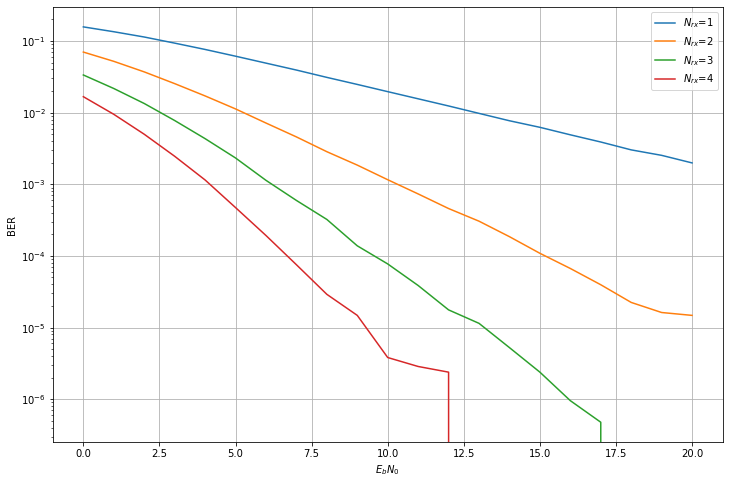

In [62]:
plt.semilogy(EbNo, ber.T)
plt.xlabel(r'$E_bN_0$')
plt.ylabel('BER')
plt.grid()
plt.legend(['$N_{rx}$=%d' % r for r in Nrx]);